In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
## from sklearn.preprocessing import MinMaxScaler

In [2]:
df= pd.read_excel(r"E:\DS_ML_PYTHON\DS_ML\Module4_Machine_Learning\Un_Supervised_ML\Day19_K-means\Iris_data.xlsx")

In [3]:
df.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,2,4.7,3.2,1.3,0.2
3,3,4.6,3.1,1.5,0.2
4,4,5.0,3.6,1.4,0.2


In [4]:
df.columns

Index(['Unnamed: 0', 'sepal length (cm)', 'sepal width (cm)',
       'petal length (cm)', 'petal width (cm)'],
      dtype='object')

In [5]:
df.describe()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,0.000000,4.300000,2.000000,1.000000,0.100000
25%,37.250000,5.100000,2.800000,1.600000,0.300000
50%,74.500000,5.800000,3.000000,4.350000,1.300000
75%,111.750000,6.400000,3.300000,5.100000,1.800000
max,149.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#Check if NA's are present
df.isna().sum()

Unnamed: 0           0
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
#Remove unwanted columns
df.drop('Unnamed: 0' , axis=1, inplace=True)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#Data Scaling
from sklearn.preprocessing import normalize
data_scaled = normalize(df)

In [10]:
wcss=[]

for i in range(2,11): #2,3,4,5,6,7,8,9,10
    k_means = KMeans(n_clusters=i)
    k_means.fit(data_scaled)
    wcss.append(k_means.inertia_)

Text(0, 0.5, 'WCSS')

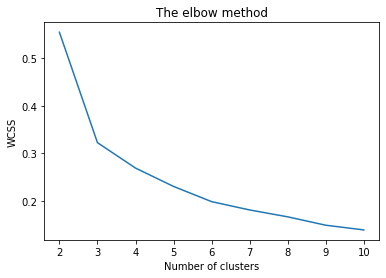

In [11]:
plt.plot(range(2,11),wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [12]:
column_names=['sepal length (cm)', 'sepal width (cm)','petal length (cm)', 'petal width (cm)']

In [13]:
data_scaled = pd.DataFrame(data_scaled, columns=column_names)

In [14]:
data_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


In [15]:
#Applying kmeans to the dataset / Creating the kmeans classifier
k_means = KMeans(n_clusters=2 , init='random' ) # calling the model # 'k-means++'
y_kmeans = k_means.fit_predict(data_scaled) # predict the values

In [16]:
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

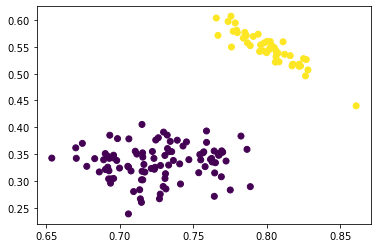

In [17]:
plt.scatter(data_scaled['sepal length (cm)'],data_scaled['sepal width (cm)'] , c=y_kmeans)

In [20]:
data_scaled[y_kmeans == 1]  # 0,1,2
# 2 - cluster 3, 66,70,72,83,84, 100 - 149
# 1 - cluster 2, 0 - 49
# 0 - cluster 1, 50 - 99

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
5,0.784175,0.566349,0.246870,0.058087
6,0.780109,0.576603,0.237425,0.050877
7,0.802185,0.545486,0.240655,0.032087
8,0.806424,0.531507,0.256589,0.036656
9,0.818031,0.517530,0.250418,0.016695
